In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('seaborn')

# Hypothesis Testing
##### October 19, 2017

In this lecture, we will discuss Hypothesis Testing, the associated p-values, and the underlying assumptions required.

## Table of Contents
* The Hypothesis Testing Framework
* Hypothesis Tests and $p$-values
  * Types of Errors
  * Relation to Precision and Recall
* The $t$ Test
  * The Student $t$ distribution

## The Hypothesis Testing Framework
Let's explore the question of whether babies born to smoker mothers are more likely to have a low birth weight than those born to non-smoker mothers. The most "obvious" way to do this would be to look at every birth (say, in a given year), examine whether the mother was a smoker, and take the average birth weight. However, since looking at every birth in the world is intractable, we'll do our best and, instead, obtain a sample of 1000 live births from North Carolina in 2003.

__Hypothesis testing is a method for taking observations in a sample and extrapolating to a population-level conclusion.__

Our first step is to phrase the question in terms of _hypotheses_. We'll state the following two:
* __Null Hypothesis__: There is no average difference in birth rate between babies born to smoker mothers versus non-smoker mothers.
* __Alternative Hypothesis__: There is a difference in birth weight between babies born to smoker mothers versus those born to non-smoker mothers.

Observe that the null hypothesis represents a "status quo" or "default" viewpoint. This is typical. Our alternative hypothesis represents the opposite viewpoint: that there is, in fact, a difference between birth weights based on the mother's respective smoking status.

#### Types of Errors
Depending on whether we decide to go with the null or the alternative hypothesis as our _conclusion_, there are two possible errors:
* If we reject the null hypothesis, there is a chance that it is in fact true.
  * This is known as a _false positive_ or a _Type I error_.
* If we fail to reject the null hypothesis, there is a chance that it is in fact false.
  * This is known as a _false negative_ or a _Type II error_.

<img src="Slide1.jpg" alt="Drawing" style="width: 540px;"/>

## Hypothesis Tests and p-Values
Note how our hypotheses were constructed. Specifically, our _null hypothesis_ was that there was no difference in average birth weight between smoker mothers and non-smoker mothers. In other words, there was "nothing going on."

Hence, our goal is to __minimize the Type 1 error__. In other words, we want to minimize the probability of a Type 1 error - that is, rejecting the null hypothesis when it is in fact true. This probability, __known as the p-value__, is also referred to as _statistical significance_.

* This statistical significance is not to be confused with "practical significance" - in particular, a difference in mean birth weight of 0.01 pounds can be deemed statistically significant with a large enough sample; however, its practical significance may be fairly low.

#### Summary of Hypothesis Testing
1. Form null and alternative hypotheses.
  * Null is a "status quo" or something to disprove.
2. Assume the null hypothesis is true.
3. __Given the null hypothesis__, find the probability of observing data as extreme as our given observations (p-value).
4. Based on the p-value, either _reject_ the null hypothesis (low $p$) and conclude the alternative hypothesis, or _fail to reject_ the null hypothesis, and have no conclusion.

In particular, we note that:
* Failing to reject the null hypothesis does NOT imply a high certainty of the null hypothesis.
    * Think criminal trials: We don't "prove" innocence, we only fail to find someone guilty (i.e. "not guilty" verdict).
* Verify all necessary statistical assumptions in Step 3!

## Example: t Test
For our example case comparing the birth weight of babies by their mothers' smoking statuses, we will perform a hypothesis test to see if there is a difference. First, let's examine the data we are given using a box plot:

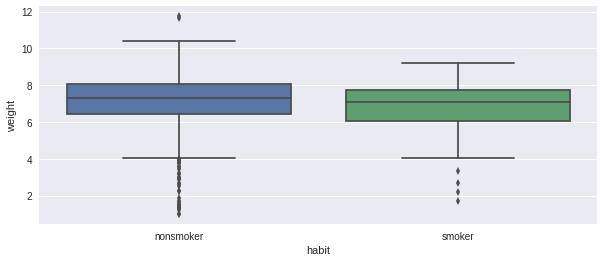

In [6]:
nc = pd.read_csv('nc.csv')
plt.figure(figsize=(10, 4))
sns.boxplot(x='habit', y='weight', data=nc)
plt.show()

From the graph, the birth weight of both sets of babies appear to be nearly normal, with the smokers' babies having a slight left skew. The smokers' babies also have a slightly lower birth weight, but it's unclear whether this is due to the smoking status, or simply due to chance.

With this in mind, we'll consider our hypotheses from earlier, and reformulate them as follows. Let $\mu_s$ and $\mu_n$ be the mean birth weight of babies born to smoking mothers and non-smoking mothers, respectively, _in our population_. Then, we can state:

* Null Hypothesis: $\mu_s - \mu_n = 0$.
* Alternative Hypothesis: $\mu_s - \mu_n \neq 0$.

__To perform our Hypothesis Test, we will assume the null hypothesis is true; that is, $\mu_s = \mu_n$.__

Our question now becomes the following: If the population means are equal, what does this say of our sample means?

#### The Student t distribution
Given a random variable (in this case, birth weight) with a normal __population__ distribution, suppose we take a __random sample__ of $n$ births. Then, the _sample mean_ is itself a random variable - depending on your random sample.

Since the population distribution is normal, the sample mean is also normally distributed. However, it is rare that we have access the population standard deviation.

Instead, we use an unbiased estimator - the sample standard deviation - to compute the standard error of the sample mean. Sinre we are taking a difference, we can estimate the standard error of the sample mean as follows:

$$SE \approx \sqrt{\frac{s_s^2}{n_s} + \frac{s_n^2}{n_n}}$$

In [35]:
smokers = nc.dropna().loc[nc['habit'] == 'smoker', 'weight']
nonsmokers = nc.dropna().loc[nc['habit'] == 'nonsmoker', 'weight']

standard_error = np.sqrt(smokers.var() / len(smokers) + nonsmokers.var() / len(nonsmokers))
standard_error

0.15252370041165506

Given a sample standard deviation $s$, then the __t statistic__

$$t = \frac{\bar{X} - \mu}{SE}$$

has a Student's t distribution, with degrees of freedom $n - 1$ (where $n$ is sample size). In our case, the distribution has the following PDF:

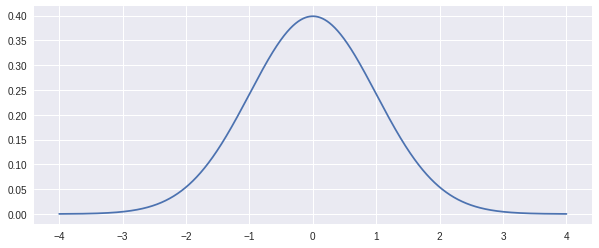

In [18]:
plt.figure(figsize=(10, 4))
x = np.linspace(-4, 4, 10000)
y = st.t.pdf(x, len(weight) - 1)
plt.plot(x, y, label='t dist, 998 DF')
plt.legend
plt.show()

In particular, the $t$ distribution resembles the normal distribution, but with less weight concentrated at the mean.

#### Obtaining a p-value
In our case, the difference between sample means $\mu_s$ and $\mu_d$ appears to be normally distributed, and we can assume the sampling is independent (there are plenty of samples, but not too many). Thus, we can use the t test.

__Assuming the null hypothesis is true__, the computed t statistic should be t distributed. With our data, we obtain a value of:

In [36]:
t = (smokers.mean() - nonsmokers.mean()) / standard_error
t

-2.3624604185134768

Finally, our goal is to look for __more__ extreme observations. Since our t statistic is negative, based on the picture of our t distribution, we will take the area under the lower tail of the distribution:

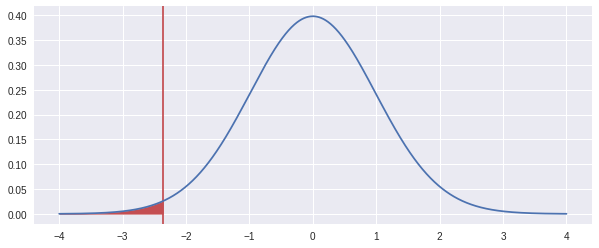

In [45]:
plt.figure(figsize=(10, 4))
x = np.linspace(-4, 4, 10000)
y = st.t.pdf(x, len(smokers) - 1)
plt.axvline(t, c='C2')
plt.fill_between(np.linspace(-4, t, 2000), np.zeros(2000), st.t.pdf(np.linspace(-4, t, 2000), len(smokers) - 1), color='C2')
plt.plot(x, y, label='t dist, 998 DF')
plt.legend
plt.show()

This area, the p-value, can be computed easily using SciPy or other analytical software:

In [48]:
p = st.t.cdf(t, len(smokers) - 1)
p

0.010247020617896188

With a p-value of 0.01, we can conclude that if there was no difference in birth weight, then we would only see a discrepancy this large in 1 out of 100 similar experiments. Since this is quite a low chance, we reject the null hypothesis, and conclude that the average birth weight of babies born to smokers is lower than the weight of babies born to non-smokers.

* Note that in different domains, we may have different "threshold" p-values. This is a subjective figure!